In [1]:
# グラフ描画に使う
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# bitFlyerにアクセスするのに使う
import pybitflyer
# 時間の管理に使う
import time
from datetime import datetime
# リアルタイムプロットに必要
from ipywidgets import FloatProgress
from IPython.display import display, clear_output
# Jupyter環境でグラフを表示するのに必要
%matplotlib inline

In [2]:
api = pybitflyer.API()
ticker = api.ticker(product_code="BTC_JPY")
print(ticker)


{'product_code': 'BTC_JPY', 'state': 'RUNNING', 'timestamp': '2021-01-16T10:47:28.09', 'tick_id': 7689938, 'best_bid': 3886631.0, 'best_ask': 3889212.0, 'best_bid_size': 0.20961, 'best_ask_size': 0.03, 'total_bid_depth': 1178.51440078, 'total_ask_depth': 982.5343152, 'market_bid_size': 0.0, 'market_ask_size': 0.0, 'ltp': 3886631.0, 'volume': 143680.88727311, 'volume_by_product': 11070.8079341}


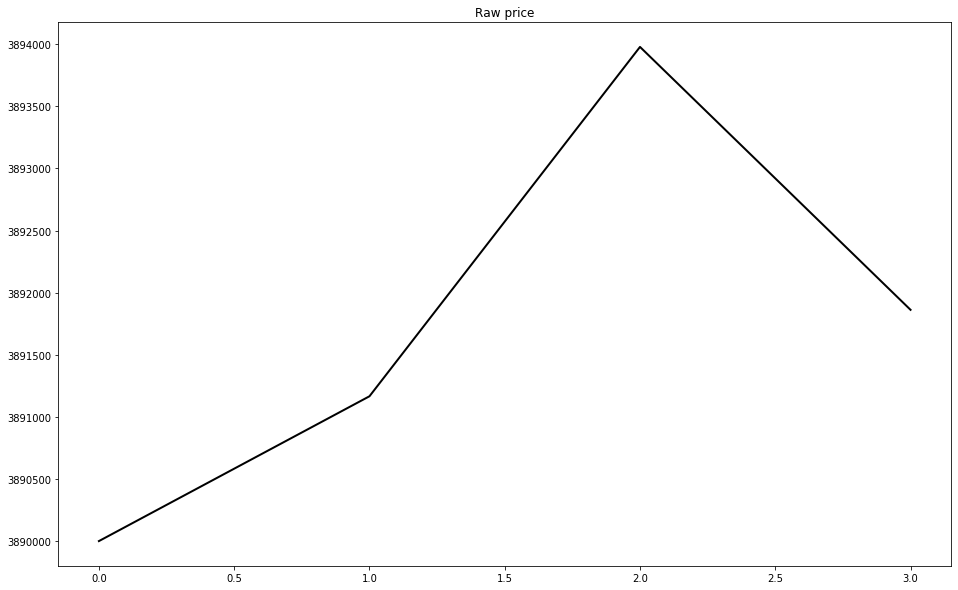

KeyboardInterrupt: 

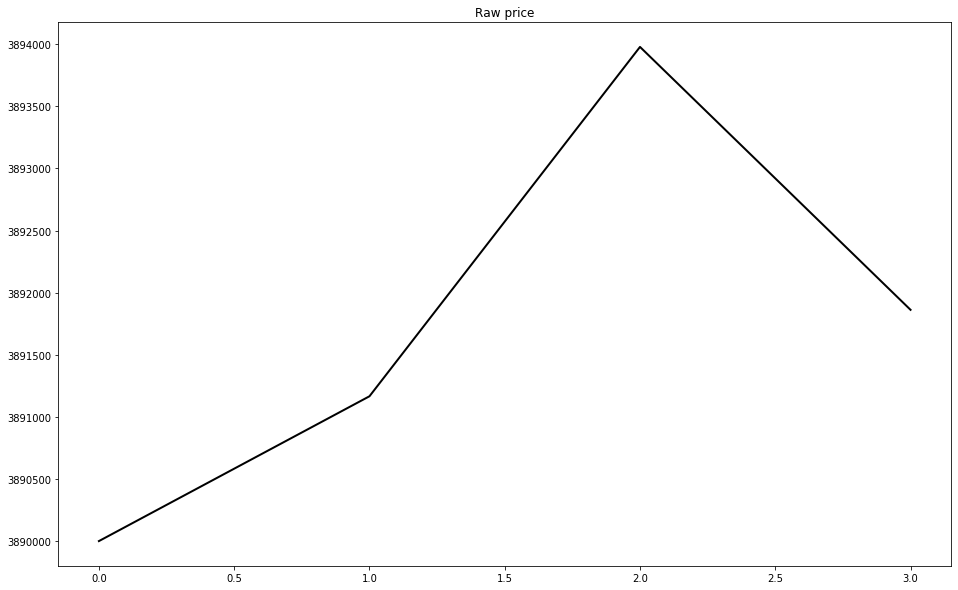

In [3]:
# 最終取引価格を格納する配列
raws = []
# プロットの準備
fig = plt.figure(figsize=(16,10))
axe = fig.add_subplot(111)

while True:
    # 毎分00秒に稼働
    if datetime.now().strftime('%S') [0:2]== '00':
        clear_output(wait = True)
        # プロット用データの更新
        tick = api.ticker(product_code = "BTC_JPY")
        raws = np.append(raws, tick['ltp'])
        # プロット
        axe.plot(raws, "black", linewidth=2, label="Raw price")
        axe.set_title("Raw price")
        display(fig)
        # 次の00秒まで休憩
        time.sleep(57)
        axe.cla()

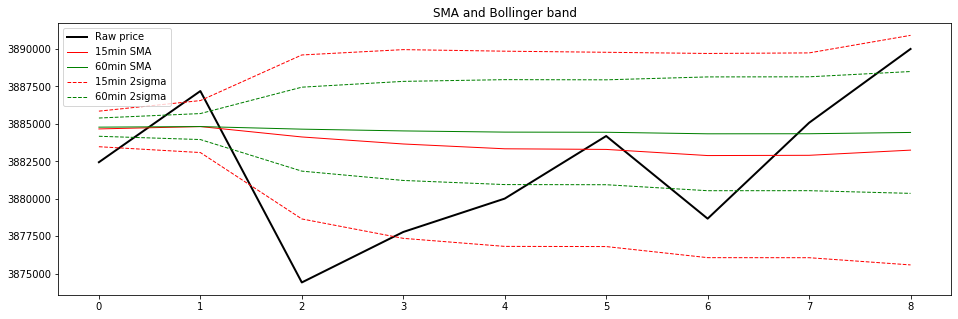

KeyboardInterrupt: 

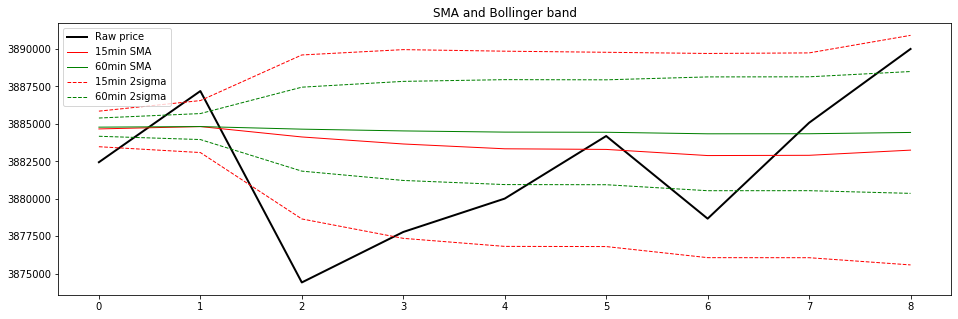

In [4]:
# 最終取引価格, 移動平均, 標準偏差を格納する配列
raws = []
sma1, sma2 = [], []
sgm1, sgm2 = [], []

# 移動平均を取る幅
itr1 = 15 # 15 mins
itr2 = 60  # 60 mins

# 60分間の最終取引価格の配列
current_price = api.ticker(product_code = "BTC_JPY")['ltp']
ltps2 = current_price*np.ones(itr2) 

plt.ion()
fig = plt.figure(figsize=(16,5))
axe = fig.add_subplot(111)

while True:
    # 60秒ごとに稼働
    if datetime.now().strftime('%S') [0:2]== '00':
        clear_output(wait = True)
        tick = api.ticker(product_code = "BTC_JPY")
        # 最終取引価格の更新
        ltps2 = np.hstack((ltps2[1:itr2], tick['ltp']))
        ltps1 = ltps2[itr2-itr1:itr2]
        # プロット用データの更新
        raws = np.append(raws, [ltps1[itr1-1]])
        sma1 = np.append(sma1, [ltps1.mean()])
        sma2.append(ltps2.mean())
        sgm1 = np.append(sgm1, [ltps1.std()])
        sgm2 = np.append(sgm2, [ltps2.std()])
        # プロット
        axe.plot(raws, "black", linewidth=2, label="Raw price")
        axe.plot(sma1, "r", linewidth=1, label="15min SMA")
        axe.plot(sma2, "g", linewidth=1, label="60min SMA")
        axe.plot(sma1+2*sgm1, "r", linewidth=1, linestyle="dashed", label="15min 2sigma")
        axe.plot(sma1-2*sgm1, "r", linewidth=1, linestyle="dashed")
        axe.plot(sma2+2*sgm2, "g", linewidth=1, linestyle="dashed", label="60min 2sigma")
        axe.plot(sma2-2*sgm2, "g", linewidth=1, linestyle="dashed")
        axe.legend(loc='upper left')
        axe.set_title("SMA and Bollinger band")
        display(fig)
        # 次の00秒まで休憩
        time.sleep(57)
        axe.cla()

In [8]:
current_price = api.ticker(product_code = "BTC_JPY")['ltp']
current_price

3867680.0

In [10]:
ltps2 = current_price*np.ones(itr2) 
ltps2

array([3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.])

In [14]:
np.hstack((ltps2[1:itr2], tick['ltp']))

array([3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3867680.,
       3867680., 3867680., 3867680., 3867680., 3867680., 3890000.])

In [13]:
tick

{'product_code': 'BTC_JPY',
 'state': 'RUNNING',
 'timestamp': '2021-01-16T11:00:59.027',
 'tick_id': 7710652,
 'best_bid': 3890892.0,
 'best_ask': 3892000.0,
 'best_bid_size': 0.1769,
 'best_ask_size': 0.3,
 'total_bid_depth': 1183.4450234,
 'total_ask_depth': 972.89650626,
 'market_bid_size': 0.0,
 'market_ask_size': 0.0,
 'ltp': 3890000.0,
 'volume': 143771.73966708,
 'volume_by_product': 11065.87909295}